In [1]:
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from math import log, e
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import os

In [3]:
#--------------------------------------#
path = os.getcwd()
files = os.listdir(path)
files

['.git',
 '.ipynb_checkpoints',
 'CS4920',
 'cs4920lab2.ipynb',
 'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv',
 'Friday-16-02-2018_TrafficForML_CICFlowMeter.csv',
 'Friday-23-02-2018_TrafficForML_CICFlowMeter.csv',
 'New folder',
 'Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv',
 'Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv',
 'Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv',
 'Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv',
 'Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv',
 'Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv']

In [4]:
files_csv = [f for f in files if f[-3:] == 'csv']
files_csv

['Friday-02-03-2018_TrafficForML_CICFlowMeter.csv',
 'Friday-16-02-2018_TrafficForML_CICFlowMeter.csv',
 'Friday-23-02-2018_TrafficForML_CICFlowMeter.csv',
 'Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv',
 'Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv',
 'Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv',
 'Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv',
 'Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv',
 'Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv']

In [8]:
list_csv = []
for f in files_csv:
   df = pd.read_csv(f, index_col=None, header=0)
   list_csv.append(df)
    
frame = pd.concat(list_csv, axis=0, ignore_index=True)

C:\Users\DREADBORN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\DREADBORN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\DREADBORN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\DREADBORN\

In [9]:
frame.replace([np.inf, -np.inf, np.nan, 'NaN','Nan', 'Infinity', -1], 0)

MemoryError: 

In [10]:
frame_label = frame['Label']
frame_label

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
               ...      
8284248    Infilteration
8284249    Infilteration
8284250           Benign
8284251    Infilteration
8284252    Infilteration
Name: Label, Length: 8284253, dtype: object

Text(0.5, 1.0, 'Table of Different Label Counts')

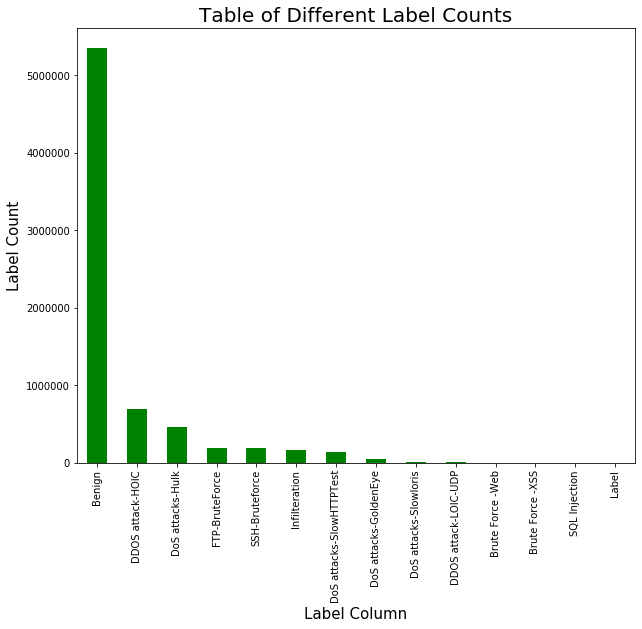

In [15]:
plt.figure(figsize=[10,8])
frame_label.value_counts().plot(kind='bar', color = 'g')
                       
plt.xlabel('Label Column', fontsize = 15)
plt.ylabel('Label Count', fontsize = 15)
plt.title('Table of Different Label Counts', fontsize = 20)

In [2]:
Fri_file = pd.read_csv('Friday-02-03-2018_TrafficForML_CICFlowMeter.csv',index_col=None, header=0)


C:\Users\DREADBORN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
Fri_file

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3389,6,02/03/2018 02:08:18,3982183,14,8,1442,1731.0,725,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1048571,3389,6,02/03/2018 02:08:22,3802316,14,8,1440,1731.0,725,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1048572,3389,6,02/03/2018 02:08:25,4004239,14,8,1459,1731.0,741,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1048573,3389,6,02/03/2018 02:08:29,3998435,14,8,1459,1731.0,741,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [3]:
Fri_file_label = Fri_file[['Flow Duration', 'Label']]
Fri_file_label

,Flow Duration,Label
0,141385,Benign
1,281,Benign
2,279824,Benign
3,132,Benign
4,274016,Benign
...,...,...
1048570,3982183,Benign
1048571,3802316,Benign
1048572,4004239,Benign
1048573,3998435,Benign


In [4]:
Fri_file_label_benign = Fri_file_label.loc[Fri_file_label['Label'] == 'Benign']
Fri_file_label_botnet = Fri_file_label.loc[Fri_file_label['Label'] == 'Bot']

In [5]:
Fri_file_label_benign = Fri_file_label_benign['Flow Duration']
Fri_file_label_botnet = Fri_file_label_botnet['Flow Duration']
Fri_file_label_botnet
Fri_file_label_benign

0           141385
1              281
2           279824
3              132
4           274016
            ...   
1048570    3982183
1048571    3802316
1048572    4004239
1048573    3998435
1048574    3972651
Name: Flow Duration, Length: 762384, dtype: int64

C:\Users\DREADBORN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:180: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  args=endog)[0] for i in range(1, gridsize)]
C:\Users\DREADBORN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:180: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  args=endog)[0] for i in range(1, gridsize)]


Text(0.5, 1.0, 'Distribution of flow durations for benign versus botnet traffic')

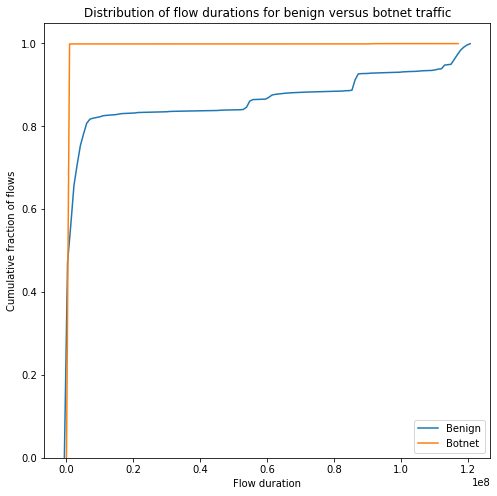

In [6]:
f, ax =plt.subplots(figsize=(8, 8))
ax = sns.kdeplot((Fri_file_label_benign), label = "Benign", cumulative=True)
ax = sns.kdeplot((Fri_file_label_botnet), label = "Botnet", cumulative=True)
ax.legend()
plt.xlabel('Flow duration')
plt.ylabel('Cumulative fraction of flows')
plt.title('Distribution of flow durations for benign versus botnet traffic')

In [43]:
Wed_file = pd.read_csv('Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv',index_col=None, header=0)

In [44]:
Wed_file

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [56]:
Wed_file_label = Wed_file[['Flow Duration', 'Label']]
Wed_file_label

,Flow Duration,Label
0,112641719,Benign
1,112641466,Benign
2,112638623,Benign
3,6453966,Benign
4,8804066,Benign
...,...,...
1048570,10156986,Benign
1048571,117,Benign
1048572,5095331,Benign
1048573,5235511,Benign


In [59]:
Wed_file_label_SSH_Bruteforce = Wed_file_label.loc[Wed_file_label['Label'] == 'SSH-Bruteforce']
Wed_file_label_benign = Wed_file_label.loc[Wed_file_label['Label'] == 'Benign']
Wed_file_label_SSH_Bruteforce = Wed_file_label_SSH_Bruteforce['Flow Duration']
Wed_file_label_benign = Wed_file_label_benign['Flow Duration']
Wed_file_label_benign

0          112641719
1          112641466
2          112638623
3            6453966
4            8804066
             ...    
1048570     10156986
1048571          117
1048572      5095331
1048573      5235511
1048574      5807256
Name: Flow Duration, Length: 667626, dtype: int64

In [64]:
def pandas_entropy(column, base=None):
  vc = pd.Series(column).value_counts(normalize=True, sort=False)
  base = e if base is None else base
  return -(vc * np.log(vc)/np.log(base)).sum()

print('Entorpy of flow duration for Benign flows:', pandas_entropy(Wed_file_label_benign))
print('Entorpy of flow duration for SSH-Bruteforce flows:', pandas_entropy(Wed_file_label_SSH_Bruteforce))

Entorpy of flow duration for Benign flows: 10.886516188170019
Entorpy of flow duration for SSH-Bruteforce flows: 6.8328973280615175


In [34]:
Fri_file = pd.read_csv('Friday-02-03-2018_TrafficForML_CICFlowMeter.csv',index_col=None, header=0)

In [29]:
Fri_file

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3389,6,02/03/2018 02:08:18,3982183,14,8,1442,1731.0,725,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1048571,3389,6,02/03/2018 02:08:22,3802316,14,8,1440,1731.0,725,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1048572,3389,6,02/03/2018 02:08:25,4004239,14,8,1459,1731.0,741,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1048573,3389,6,02/03/2018 02:08:29,3998435,14,8,1459,1731.0,741,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [35]:
Fri_file = Fri_file.replace(['Benign', 'Bot'], [0,1])

In [36]:
Fri_file = Fri_file.drop(['Timestamp'], axis= 1)

In [37]:
Fri_file = Fri_file.apply(pd.to_numeric, errors='coerce').replace([np.nan, np.inf, -np.inf], 0).clip(lower=0)

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,141385,9,7,553,3773.0,202,0,61.444444,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,49684,6,281,2,1,38,0.0,38,0,19.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,443,6,279824,11,15,1086,10527.0,385,0,98.727273,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,443,6,132,2,0,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,443,6,274016,9,13,1285,6141.0,517,0,142.777778,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3389,6,3982183,14,8,1442,1731.0,725,0,103.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1048571,3389,6,3802316,14,8,1440,1731.0,725,0,102.857143,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1048572,3389,6,4004239,14,8,1459,1731.0,741,0,104.214286,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1048573,3389,6,3998435,14,8,1459,1731.0,741,0,104.214286,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [38]:
Fri_file.head(45000)

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,141385,9,7,553,3773.0,202,0,61.444444,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,49684,6,281,2,1,38,0.0,38,0,19.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,443,6,279824,11,15,1086,10527.0,385,0,98.727273,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,443,6,132,2,0,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,443,6,274016,9,13,1285,6141.0,517,0,142.777778,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,8080,6,477,2,0,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
44996,8080,6,10001,3,4,326,129.0,326,0,108.666667,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
44997,8080,6,474,2,0,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
44998,8080,6,9768,3,4,326,129.0,326,0,108.666667,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [39]:
Fri_fil_shuff = Fri_file.reindex(np.random.permutation(Fri_file.index))

In [40]:
Fri_fil_shuff

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
201941,8080,6,17412,3,4,326,129.0,326,0,108.666667,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
752843,3389,6,3717944,12,9,1460,1731.0,741,0,121.666667,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
537425,445,6,215135,3,1,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
463373,3389,6,3825548,13,8,1439,1731.0,725,0,110.692308,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
612080,53,17,248,1,1,36,52.0,36,36,36.000000,...,8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326686,8080,6,500,2,0,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
978831,443,6,372318,9,7,553,3773.0,202,0,61.444444,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
587726,0,0,112640784,3,0,0,0.0,0,0,0.000000,...,0,0.0,0.0,0.0,0.0,56300000.0,38.183766,56300000.0,56300000.0,0
27366,8080,6,449,2,0,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1


In [41]:
x = Fri_fil_shuff.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [42]:
df

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,0.123295,0.352941,0.000145,0.000046,0.000058,0.000296,1.277228e-06,0.190532,0.000000,0.074429,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,1.0
1,0.051714,0.352941,0.030983,0.000255,0.000130,0.001327,1.713861e-05,0.433080,0.000000,0.083333,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0
2,0.006790,0.352941,0.001793,0.000046,0.000014,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0
3,0.051714,0.352941,0.031880,0.000278,0.000116,0.001307,1.713861e-05,0.423729,0.000000,0.075817,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0
4,0.000809,1.000000,0.000002,0.000000,0.000014,0.000033,5.148515e-07,0.021040,0.024658,0.024658,...,0.181818,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0.123295,0.352941,0.000004,0.000023,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,1.0
1048571,0.006760,0.352941,0.003103,0.000185,0.000101,0.000502,3.735644e-05,0.118060,0.000000,0.042085,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0
1048572,0.000000,0.000000,0.938673,0.000046,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.469167,5.030799e-07,0.469167,0.469167,0.0
1048573,0.123295,0.352941,0.000004,0.000023,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,1.0


In [64]:
df_Benign = df.loc[df[78] == 0]
df_Botnet = df.loc[df[78] == 1]
df_Botnet = df_Botnet[0:150]
df_Benign = df_Benign[0:150]
df_all = pd.concat([df_Benign, df_Botnet])
df_all

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
1,0.051714,0.352941,0.030983,0.000255,0.000130,0.001327,1.713861e-05,0.433080,0.000000,0.083333,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.006790,0.352941,0.001793,0.000046,0.000014,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.051714,0.352941,0.031880,0.000278,0.000116,0.001307,1.713861e-05,0.423729,0.000000,0.075817,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000809,1.000000,0.000002,0.000000,0.000014,0.000033,5.148515e-07,0.021040,0.024658,0.024658,...,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000809,1.000000,0.000004,0.000000,0.000014,0.000043,6.237624e-07,0.027469,0.032192,0.032192,...,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,0.123295,0.352941,0.000006,0.000023,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
572,0.123295,0.352941,0.000099,0.000046,0.000058,0.000296,1.277228e-06,0.190532,0.000000,0.074429,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
576,0.123295,0.352941,0.000004,0.000023,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
579,0.123295,0.352941,0.000091,0.000046,0.000058,0.000296,1.277228e-06,0.190532,0.000000,0.074429,...,0.454545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


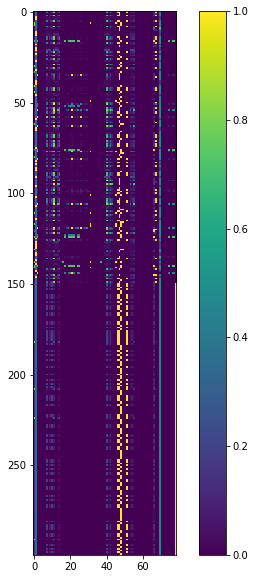

In [65]:
plt.figure(figsize=(8,10))
plt.imshow(df_all)
plt.colorbar()
plt.grid(False)
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import normalize

Fri_file = pd.read_csv('Friday-02-03-2018_TrafficForML_CICFlowMeter.csv',index_col=None, header=0)
Fri_file = Fri_file.drop(['Timestamp'], axis= 1)
Fri_file = Fri_file.replace(['Benign', 'Bot'], [0,1])


C:\Users\DREADBORN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
Fri_file = Fri_file.apply(pd.to_numeric, errors='coerce').replace([np.nan, np.inf, -np.inf], 0).clip(lower=0)


In [26]:
#preprocessing/normalizing
def normalize_me(df):
    df.iloc[:,:-1] = normalize(df.iloc[:,:-1], axis=0, norm='max')
    return df
#--------------- Normalized
y = Fri_file['Label'] #data without labels
x = normalize_me(Fri_file).drop('Label', axis = 1) #data with labels
#--------------- Not Normalized
#x = Fri_file.drop('Label', axis = 1) #data with labels

In [27]:
train_data, test_data, train_labels, test_labels = train_test_split(x.to_numpy(), y.to_numpy(), test_size = 0.2, random_state = 99)


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation='exponential'),
    tf.keras.layers.Dense(2, activation='softmax')])
model.compile(optimizer='adam',
             loss ='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_data, train_labels, epochs=5, verbose=2)
predictions = model.predict(test_data)
scores = model.evaluate(test_data, test_labels, verbose=2)


Train on 838860 samples
Epoch 1/5
838860/838860 - 23s - loss: 0.0712 - accuracy: 0.9757
Epoch 2/5
838860/838860 - 22s - loss: 0.0353 - accuracy: 0.9918
Epoch 3/5
838860/838860 - 22s - loss: 0.0321 - accuracy: 0.9934
Epoch 4/5
838860/838860 - 23s - loss: 0.0307 - accuracy: 0.9939
Epoch 5/5
838860/838860 - 23s - loss: 0.0284 - accuracy: 0.9943
209715/1 - 4s - loss: 0.0139 - accuracy: 0.9943


In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(x.to_numpy(), y.to_numpy())

5

In [29]:
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [31]:
for train_index, test_index in skf.split(x.to_numpy(), y.to_numpy()):
    print("TRAIN:", train_index, "TEST:", test_index)
    train_data, test_data = x.to_numpy()[train_index], x.to_numpy()[test_index]
    train_labels, test_labels = y.to_numpy()[train_index], y.to_numpy()[test_index]

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation='exponential'),
    tf.keras.layers.Dense(2, activation='softmax')])
model.compile(optimizer='adam',
             loss ='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_data, train_labels, epochs=5, verbose=2)
predictions = model.predict(test_data)
scores = model.evaluate(test_data, test_labels, verbose=2)


TRAIN: [  72910   72911   72912 ... 1048572 1048573 1048574] TEST: [     0      1      2 ... 438665 438666 438667]
TRAIN: [      0       1       2 ... 1048572 1048573 1048574] TEST: [ 72910  72911  72912 ... 591142 591143 591144]
TRAIN: [      0       1       2 ... 1048572 1048573 1048574] TEST: [139328 139329 139330 ... 743619 743620 743621]
TRAIN: [      0       1       2 ... 1048572 1048573 1048574] TEST: [209918 209919 209920 ... 896096 896097 896098]
TRAIN: [     0      1      2 ... 896096 896097 896098] TEST: [ 286106  286107  286108 ... 1048572 1048573 1048574]
Train on 838861 samples
Epoch 1/5
838861/838861 - 23s - loss: 0.0752 - accuracy: 0.9736
Epoch 2/5
838861/838861 - 24s - loss: 0.0356 - accuracy: 0.9916
Epoch 3/5
838861/838861 - 24s - loss: 0.0324 - accuracy: 0.9933
Epoch 4/5
838861/838861 - 24s - loss: 0.0298 - accuracy: 0.9941
Epoch 5/5
838861/838861 - 24s - loss: 0.0265 - accuracy: 0.9945
209714/1 - 4s - loss: 0.0161 - accuracy: 0.9967


In [32]:
print(classification_report(test_labels, predictions))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets